In [83]:
FOLDER = "./data"
PREFIX = "frota_"
SUFFIX = ""
EXTENSION = "xls"

FILES = []
for i in range (2004, 2025):
    FILES.append(
        {
            "year": i,
            "path": f'{FOLDER}/{PREFIX}{i}{SUFFIX}.{EXTENSION}'
        }
    )

FILES

[{'year': 2004, 'path': './data/frota_2004.xls'},
 {'year': 2005, 'path': './data/frota_2005.xls'},
 {'year': 2006, 'path': './data/frota_2006.xls'},
 {'year': 2007, 'path': './data/frota_2007.xls'},
 {'year': 2008, 'path': './data/frota_2008.xls'},
 {'year': 2009, 'path': './data/frota_2009.xls'},
 {'year': 2010, 'path': './data/frota_2010.xls'},
 {'year': 2011, 'path': './data/frota_2011.xls'},
 {'year': 2012, 'path': './data/frota_2012.xls'},
 {'year': 2013, 'path': './data/frota_2013.xls'},
 {'year': 2014, 'path': './data/frota_2014.xls'},
 {'year': 2015, 'path': './data/frota_2015.xls'},
 {'year': 2016, 'path': './data/frota_2016.xls'},
 {'year': 2017, 'path': './data/frota_2017.xls'},
 {'year': 2018, 'path': './data/frota_2018.xls'},
 {'year': 2019, 'path': './data/frota_2019.xls'},
 {'year': 2020, 'path': './data/frota_2020.xls'},
 {'year': 2021, 'path': './data/frota_2021.xls'},
 {'year': 2022, 'path': './data/frota_2022.xls'},
 {'year': 2023, 'path': './data/frota_2023.xls'},


In [92]:
import pandas as pd

all_data = []
previous = []

for file in FILES:
    print(file['year'])
    
    excel_file = pd.ExcelFile(file['path'])
    data = pd.read_excel(file['path'], sheet_name=excel_file.sheet_names[-1], skiprows=3, header=0)

    data.columns = (
        data.columns.str.normalize('NFKD')  # Decompose unicode characters
        .str.encode('ascii', errors='ignore')  # Remove non-ASCII characters
        .str.decode('utf-8')  # Decode back to UTF-8
        .str.strip()  # Remove leading/trailing spaces
        .str.lower()  # Convert to lowercase
    )

    data['ano'] = file['year']

    all_data.append(data)

df = pd.concat(all_data)
df.head()

2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024


,uf,municipio,total,automovel,bonde,caminhao,caminhao trator,caminhonete,camioneta,chassi plataf,...,quadriciclo,reboque,semi-reboque,side-car,outros,trator esteira,trator rodas,triciclo,utilitario,ano
0,AC,ACRELANDIA,673.0,126.0,0.0,48.0,4.0,21.0,63.0,0.0,...,0.0,3.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,2004
1,AC,ASSIS BRASIL,126.0,32.0,0.0,10.0,0.0,3.0,15.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2004
2,AC,BRASILEIA,1348.0,304.0,0.0,83.0,10.0,43.0,104.0,0.0,...,0.0,9.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,2004
3,AC,BUJARI,195.0,66.0,0.0,29.0,1.0,8.0,18.0,0.0,...,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2004
4,AC,CAPIXABA,148.0,47.0,0.0,12.0,1.0,9.0,18.0,0.0,...,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2004


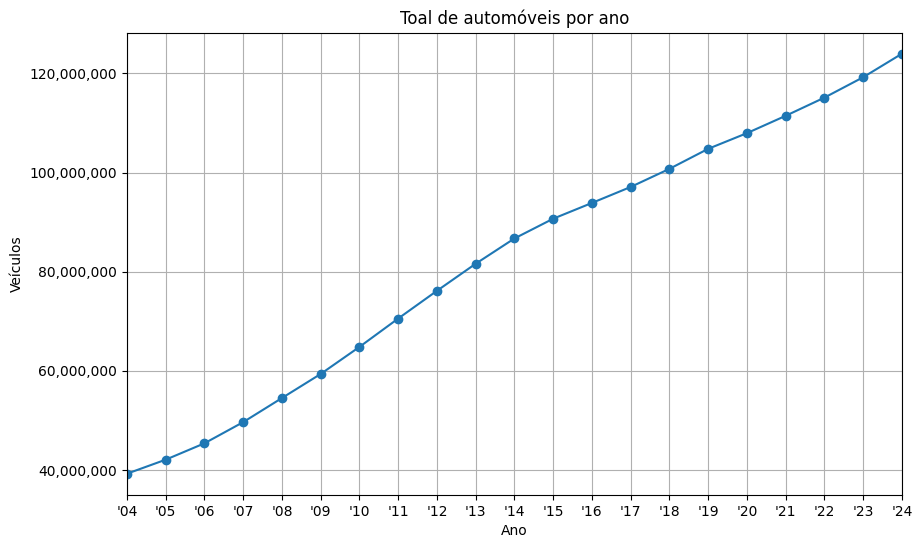

In [91]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MaxNLocator

df_group_total = df.groupby('ano')['total'].sum().reset_index()

plt.figure(figsize=(10, 6))  
plt.plot(df_group_total['ano'], df_group_total['total'], marker='o', linestyle='-')
plt.title('Toal de automóveis por ano') 
plt.xlabel('Ano') 
plt.ylabel('Veículos') 
plt.grid(True, which='both', axis='both') 

plt.xlim(df['ano'].min(), df['ano'].max())
plt.gca().xaxis.set_major_locator(MaxNLocator(df['ano'].max() - df['ano'].min()))
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f"'{int(x) % 100:02d}"))
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f}'))

plt.show() 

